# Logistic Regression

Logistic regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs. "no" or "young" vs. "old". 

These are categories that translate to a probability of being a 0 or a 1 

We can calculate the logistic regression by applying an activation function as the final step to our linear model. 
It is a special case of linear regression as it predicts the probabilities of outcome using log function. We use the activation function (sigmoid) to convert the outcome into categorical value.

This converts the linear regression output to a probability.

In [1]:
# Add dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Data Understanding EDA

In [2]:
df =pd.read_csv('Resources/diabetes.csv')
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [9]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Data Visualization

<AxesSubplot:>

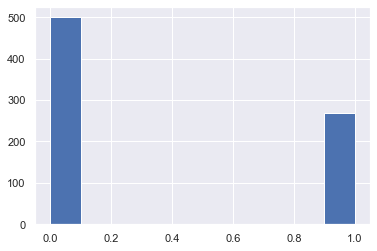

In [13]:
df['Outcome'].hist()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

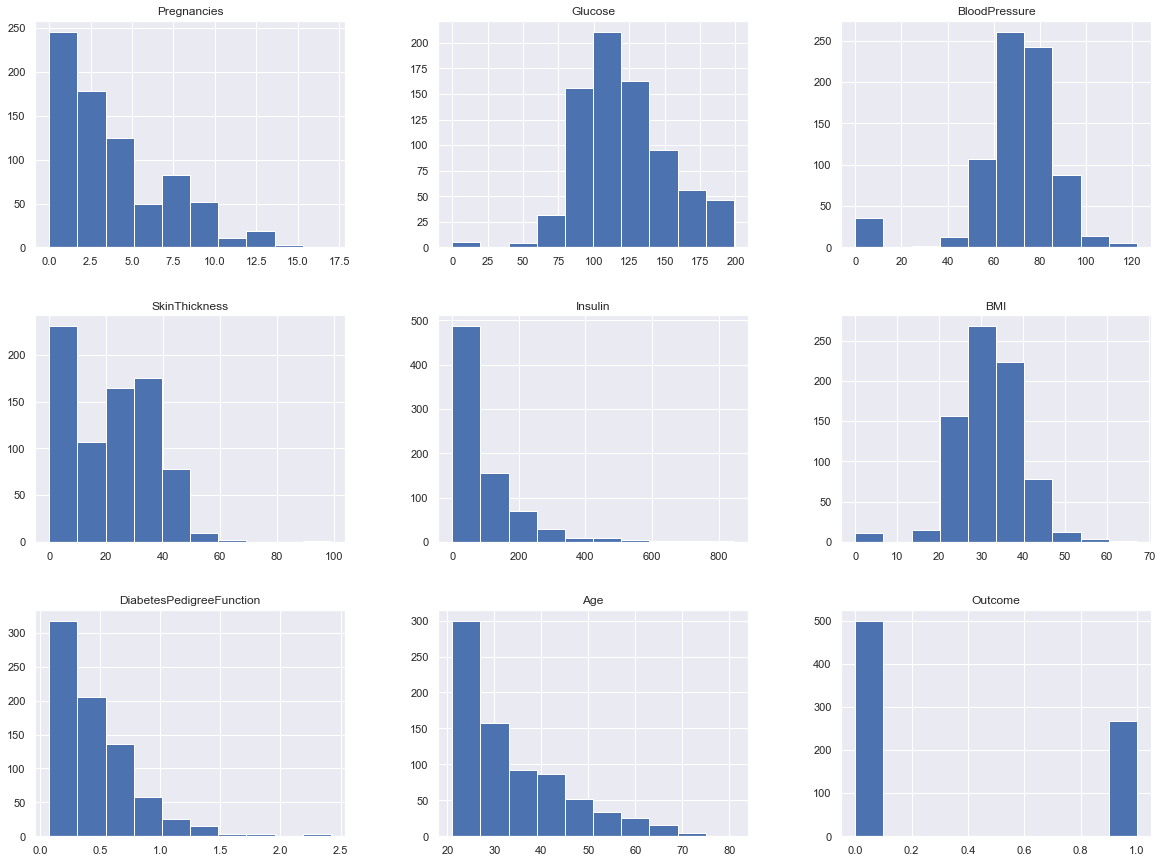

In [14]:
df.hist(figsize=(20,15))

<AxesSubplot:xlabel='BMI', ylabel='Density'>

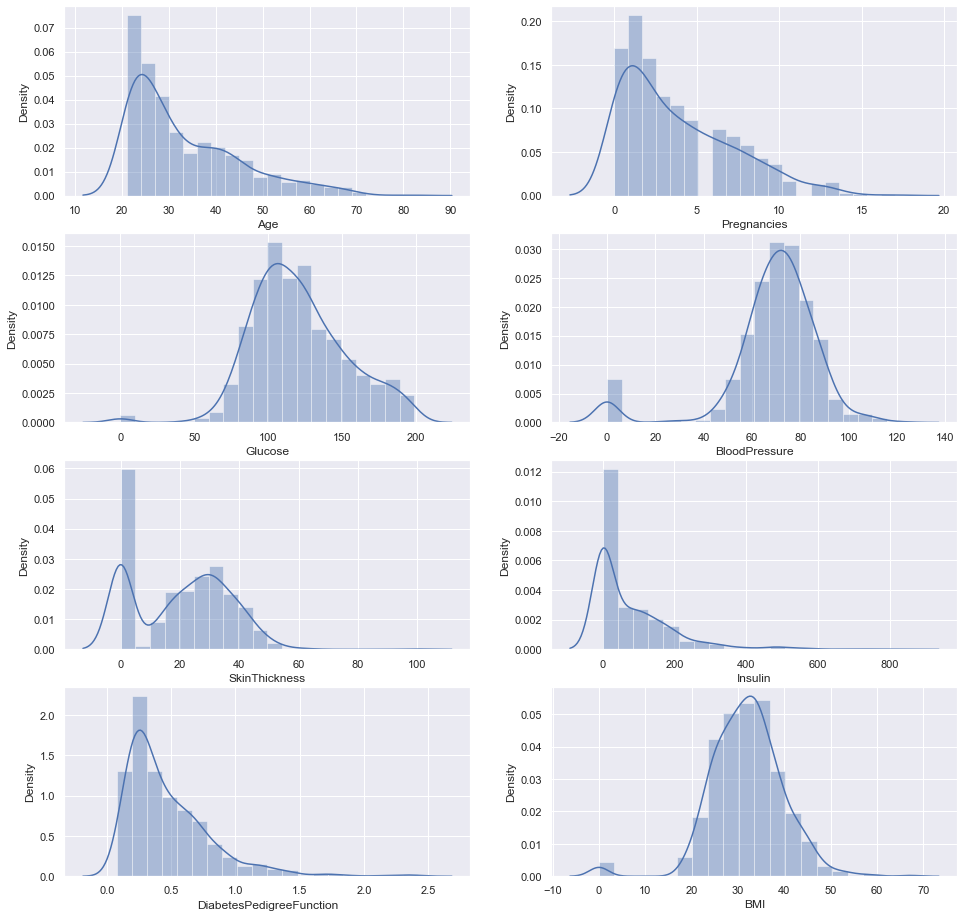

In [15]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

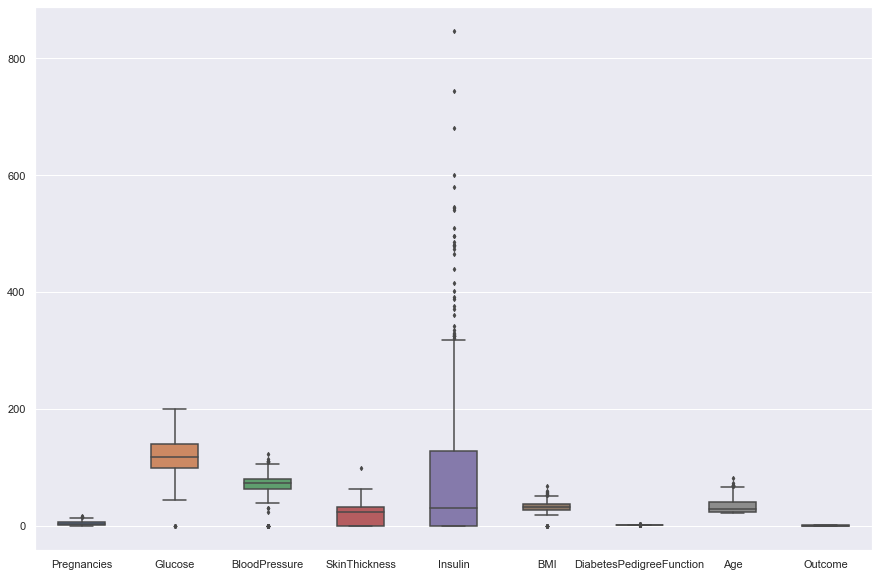

In [16]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [17]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


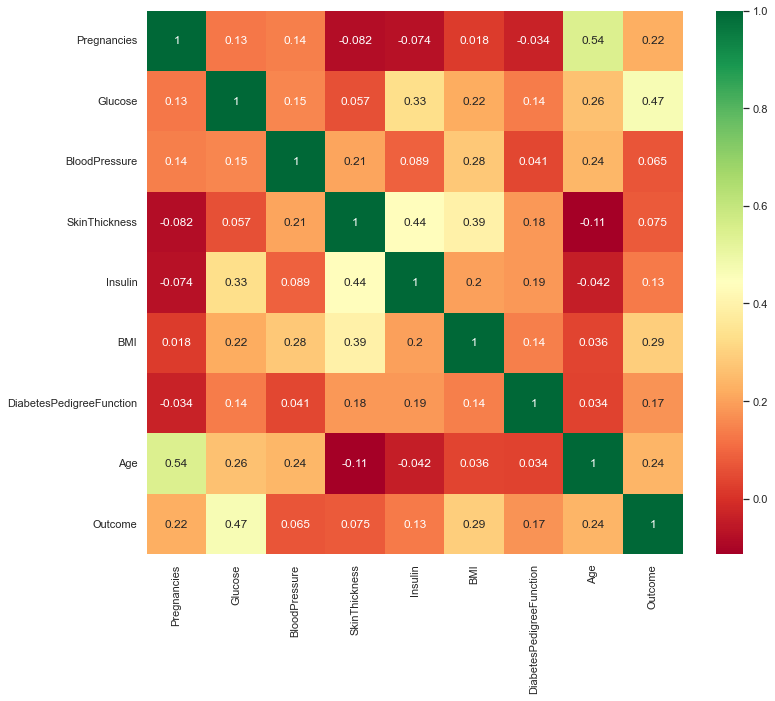

In [19]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# Data Preprocessing

## Missing Values

Impute the missing values "mean" for numerical columns
and for categorical columns with its "mode"

In [29]:
# replace 0 with NAN
import numpy as np
df_copy = df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [31]:
#pip install missingno

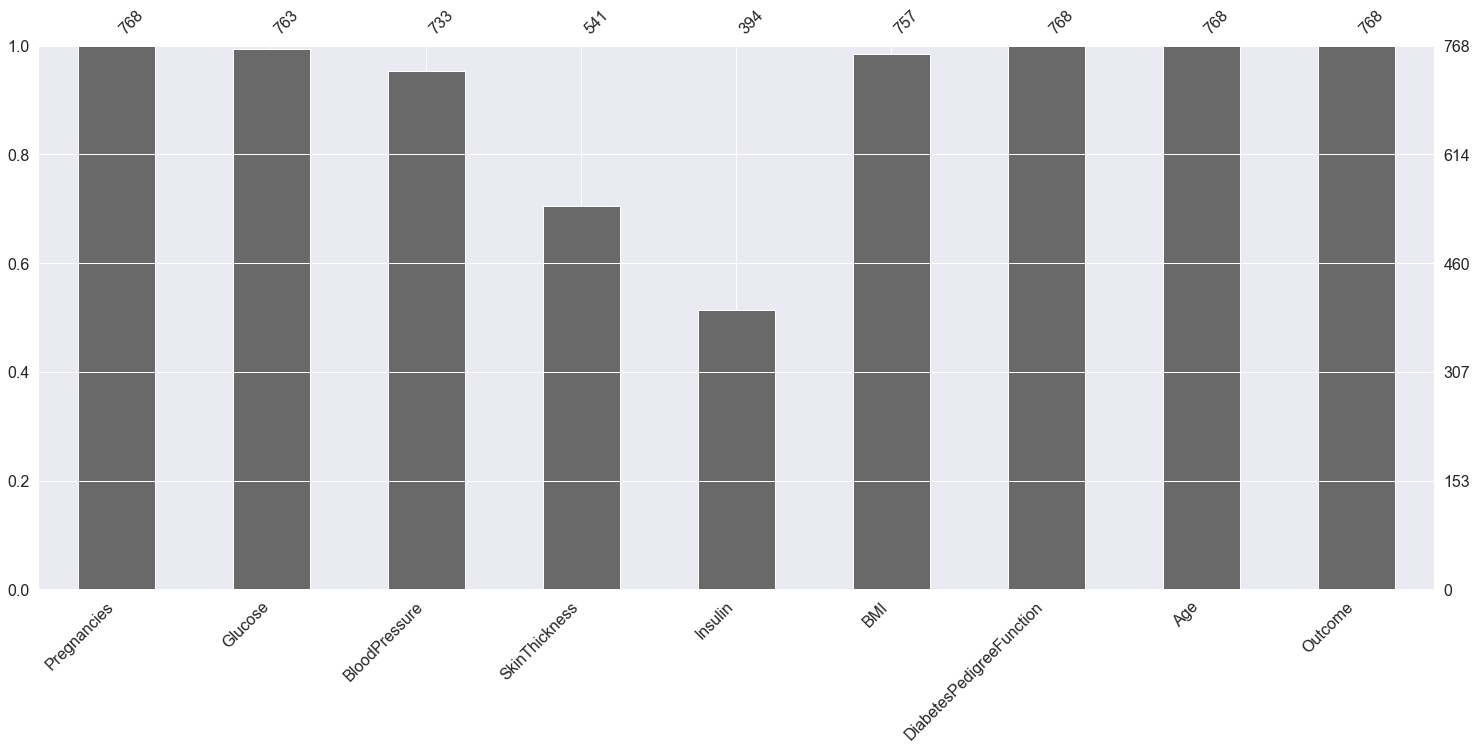

In [32]:
import missingno as msno
msno.bar(df_copy);

In [33]:
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

In [34]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


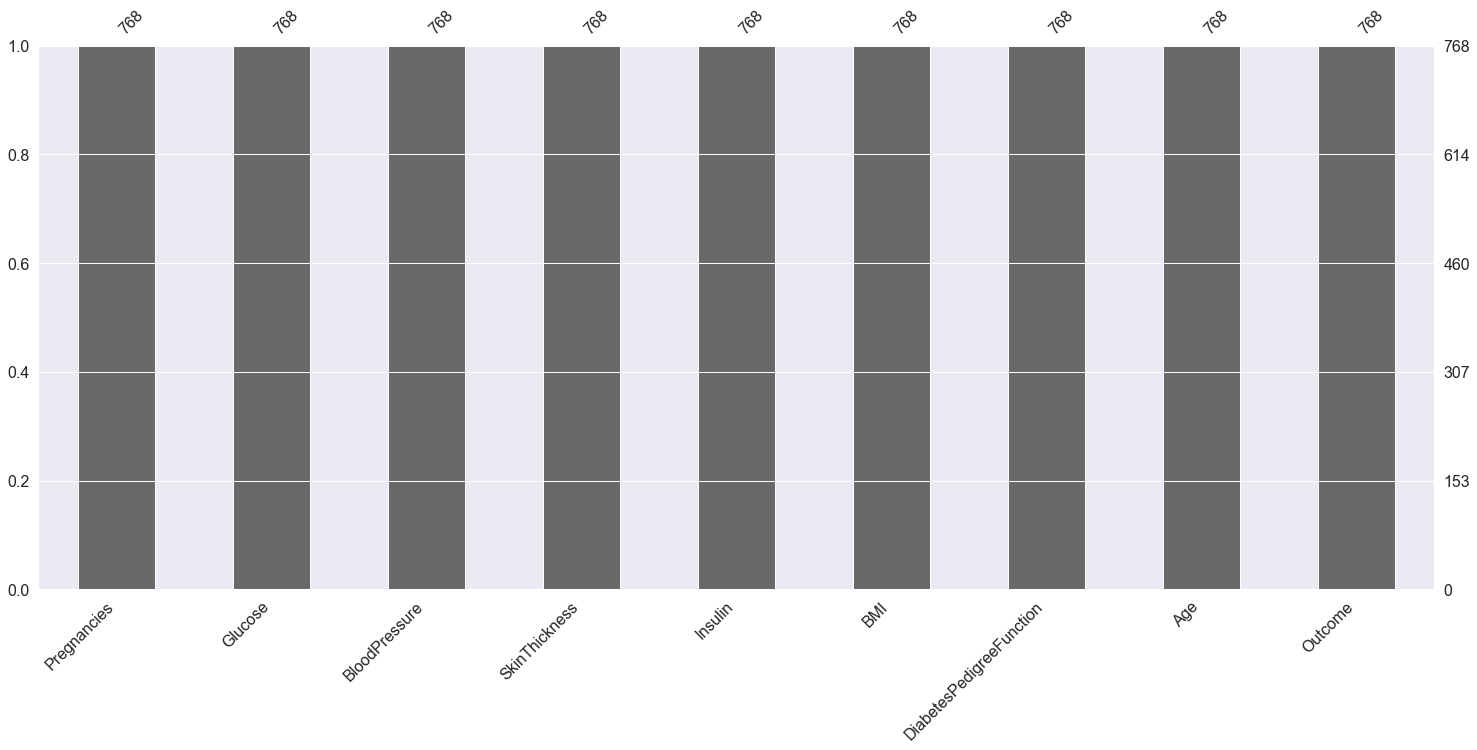

In [35]:
msno.bar(df_copy);

In [27]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

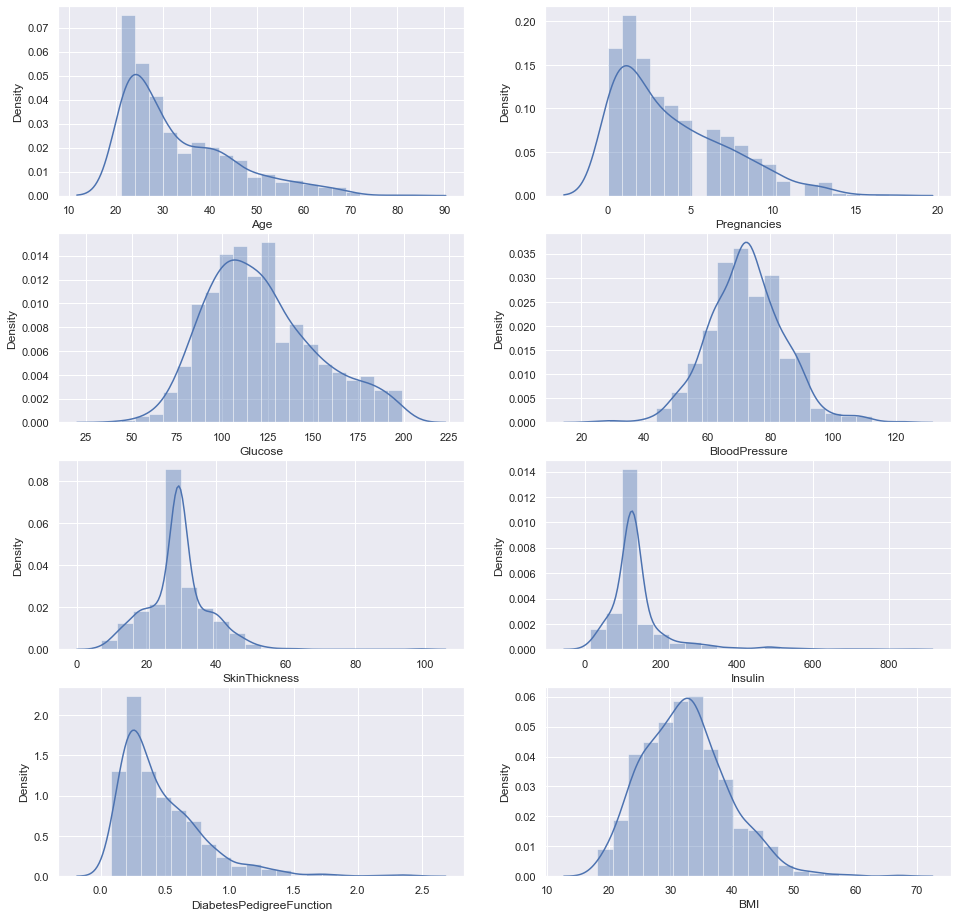

In [28]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df_copy.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df_copy.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df_copy.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df_copy.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df_copy.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df_copy.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df_copy.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df_copy.BMI, bins = 20, ax=ax[3,1]) 

## Outliers

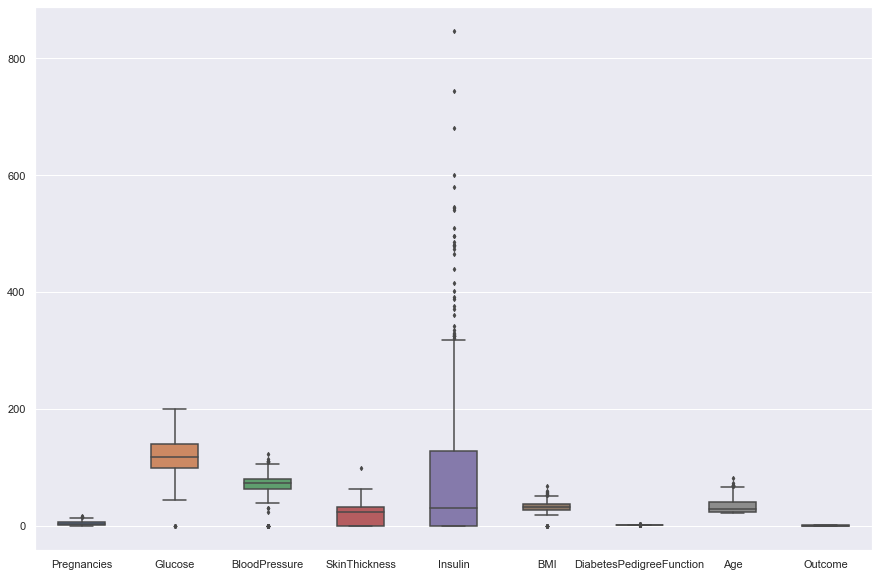

In [38]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [43]:
outLier_df= df.copy()
Q1 = outLier_df.Insulin.quantile(0.25)
Q3 = outLier_df.Insulin.quantile(0.75)
IQR = Q3-Q1
print(round(IQR,2))


127.25


In [44]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(round(lower,2))
print(round(upper,2))

-190.88
318.12


In [45]:

outLier_df= outLier_df[~((outLier_df['Insulin']< lower) |(outLier_df['Insulin']> upper))]

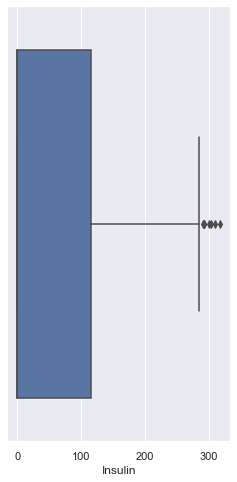

In [46]:
plt.rcParams['figure.figsize'] = 4,8
sns.boxplot(x ='Insulin', data = outLier_df, orient ='v');

In [50]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(outLier_df)
print("Outliers from IQR method: ", sample_outliers)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U24'), dtype('<U13')) -> None

In [48]:

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = logistic_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(logistic_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = logistic_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(logistic_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()


NameError: name 'make_pipeline' is not defined